# Periodic Table
## Predicting the phase of elements
## Linear Regression on Boiling point and Melting Point

In [1]:
# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import binarize
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploring the data

In [3]:
data = pd.read_csv("periodic_table.csv")
data.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0


In [4]:
len(data)
#we have all elements!

118

In [5]:
data.columns

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

In [6]:
data.isna().sum()

AtomicNumber           0
Element                0
Symbol                 0
AtomicMass             0
NumberofNeutrons       0
NumberofProtons        0
NumberofElectrons      0
Period                 0
Group                 28
Phase                  0
Radioactive           81
Natural               28
Metal                 26
Nonmetal              99
Metalloid            111
Type                   3
AtomicRadius          32
Electronegativity     22
FirstIonization       16
Density               13
MeltingPoint          20
BoilingPoint          20
NumberOfIsotopes      15
Discoverer             9
Year                  11
SpecificHeat          33
NumberofShells         0
NumberofValence       69
dtype: int64

In [7]:
data.describe()

,AtomicNumber,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Year,SpecificHeat,NumberofShells,NumberofValence
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,90.000000,86.000000,96.000000,102.000000,105.000000,98.000000,98.000000,103.000000,107.000000,85.000000,118.000000,49.000000
mean,59.500000,145.988297,86.483051,59.500000,59.500000,5.254237,9.944444,1.825814,1.695000,7.988505,9.232161,1281.475184,2513.143163,28.116505,1865.280374,0.635976,5.254237,4.428571
std,34.207699,88.954899,54.785320,34.207699,34.207699,1.618200,5.597674,0.611058,0.621174,3.334571,8.630406,903.685175,1601.901036,35.864205,97.951740,1.653965,1.618200,2.345208
min,1.000000,1.007000,0.000000,1.000000,1.000000,1.000000,1.000000,0.490000,0.700000,3.893900,0.000090,14.175000,4.220000,3.000000,1250.000000,0.094000,1.000000,1.000000
25%,30.250000,66.465750,36.000000,30.250000,30.250000,4.000000,5.000000,1.425000,1.237500,6.004850,2.700000,510.695000,1069.000000,11.000000,1803.500000,0.168000,4.000000,2.000000
50%,59.500000,142.575000,83.000000,59.500000,59.500000,6.000000,10.500000,1.800000,1.585000,6.960250,7.290000,1204.150000,2767.000000,19.000000,1878.000000,0.244000,6.000000,4.000000
75%,88.750000,226.750000,138.000000,88.750000,88.750000,7.000000,15.000000,2.200000,2.062500,8.964925,12.000000,1811.150000,3596.750000,24.000000,1940.000000,0.489000,7.000000,6.000000
max,118.000000,295.000000,178.000000,118.000000,118.000000,7.000000,18.000000,3.300000,3.980000,24.587400,41.000000,3948.150000,5869.000000,203.000000,2010.000000,14.304000,7.000000,8.000000


In [8]:
data.dtypes

AtomicNumber           int64
Element               object
Symbol                object
AtomicMass           float64
NumberofNeutrons       int64
NumberofProtons        int64
NumberofElectrons      int64
Period                 int64
Group                float64
Phase                 object
Radioactive           object
Natural               object
Metal                 object
Nonmetal              object
Metalloid             object
Type                  object
AtomicRadius         float64
Electronegativity    float64
FirstIonization      float64
Density              float64
MeltingPoint         float64
BoilingPoint         float64
NumberOfIsotopes     float64
Discoverer            object
Year                 float64
SpecificHeat         float64
NumberofShells         int64
NumberofValence      float64
dtype: object

## Cleaning the data

### Now that we know more about our data we will try to clean it by changing some values and filling the missing ones. 

### let's first go over each column and make some changes:

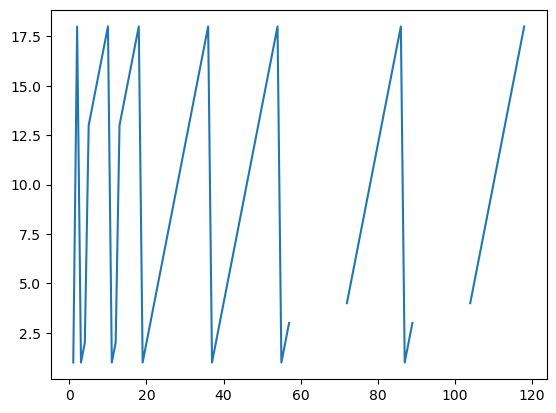

In [9]:
#we can see that there are 28 missing values in the "Group" column. I guess it is because of Lanthanides and Actinides.
#So let's take a quick look to be sure by using a simple plot:
plt.plot(data["AtomicNumber"], data["Group"])

In [10]:
# There is a gap exactly where these elements are located.
# We will replace atomic numbers of 57-70 with "Lan" and 89-103 with "Act".

data["Group"].fillna("L/A", inplace=True)

In [11]:
#Let's move on to the next column:
#This shows that we have 81 non radioactive elements  are NaN :
data["Radioactive"].isnull().sum()

81

In [12]:
# #let's mark them as "no":
data["Radioactive"].fillna("No", inplace=True)

In [13]:
data["Radioactive"].isna().sum()

0

In [14]:
data["Radioactive"]

0       No
1       No
2       No
3       No
4       No
      ... 
113    yes
114    yes
115    yes
116    yes
117    yes
Name: Radioactive, Length: 118, dtype: object

In [15]:
# we will apply this to other columns in which "no" is considered as NaN:
data["Natural"].fillna("No", inplace=True)
data["Metal"].fillna("No", inplace=True)
data["Nonmetal"].fillna("No", inplace=True)
data["Metalloid"].fillna("No", inplace=True)
#NOTE: dataset is not accurate since we know that there are 26* artifical elements and 6* metalloids and ...
#But we will keep the dataset as it is and move forward

In [16]:
#There are also 3 NaN values in the Type column. let's see which elements they are to replace them with appropriate values. 
data[data['Type'].isna()]

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
112,113,Nihonium,Nh,284.0,171,113,113,7,13.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,NaN,7,3.0
114,115,Moscovium,Mc,288.0,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
116,117,Tennessine,Ts,295.0,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


In [17]:
# we can fit them in the Transactinide  category:
data["Type"].fillna("Transactinide", inplace=True)

In [18]:
data.isna().sum()

AtomicNumber          0
Element               0
Symbol                0
AtomicMass            0
NumberofNeutrons      0
NumberofProtons       0
NumberofElectrons     0
Period                0
Group                 0
Phase                 0
Radioactive           0
Natural               0
Metal                 0
Nonmetal              0
Metalloid             0
Type                  0
AtomicRadius         32
Electronegativity    22
FirstIonization      16
Density              13
MeltingPoint         20
BoilingPoint         20
NumberOfIsotopes     15
Discoverer            9
Year                 11
SpecificHeat         33
NumberofShells        0
NumberofValence      69
dtype: int64

In [19]:
# It is somehow weird to see missing values in "NumberofValence" column. We can calculate the number of valence electrons for all elements.
# Since these numbers are linearly related to the atomic number,interpolation will be the best method to fill these missing values.
data['NumberofValence'].interpolate(method="linear", inplace=True)

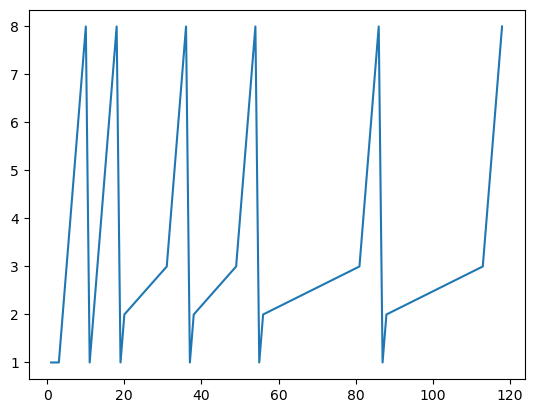

In [20]:
# We can see that the relation somehow makes sence in the graph below:
plt.plot(data["AtomicNumber"], data['NumberofValence'])

In [21]:
# Now lets check electronegativity:
data[data['Electronegativity'].isna()]

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,1.00
9,10,Neon,Ne,20.180,10,10,10,2,18.0,gas,...,21.5645,0.000900,24.703,27.07,8.0,Ramsay and Travers,1898.0,1.030,2,8.00
17,18,Argon,Ar,39.948,22,18,18,3,18.0,gas,...,15.7596,0.001780,83.960,87.30,8.0,Rayleigh and Ramsay,1894.0,0.520,3,8.00
35,36,Krypton,Kr,83.798,48,36,36,4,18.0,gas,...,13.9996,0.003730,115.930,119.93,23.0,Ramsay and Travers,1898.0,0.248,4,8.00
53,54,Xenon,Xe,131.293,77,54,54,5,18.0,gas,...,12.1298,0.005890,161.450,165.03,31.0,Ramsay and Travers,1898.0,0.158,5,8.00
85,86,Radon,Rn,222.000,136,86,86,6,18.0,gas,...,10.7485,0.009730,202.150,211.30,20.0,Dorn,1900.0,0.094,6,8.00
102,103,Lawrencium,Lr,262.000,159,103,103,7,L/A,artificial,...,NaN,NaN,NaN,NaN,203.0,Ghiorso et al.,1961.0,NaN,7,2.60
103,104,Rutherfordium,Rf,261.000,157,104,104,7,4.0,artificial,...,NaN,18.100000,NaN,NaN,NaN,Ghiorso et al.,1969.0,NaN,7,2.64
104,105,Dubnium,Db,262.000,157,105,105,7,5.0,artificial,...,NaN,39.000000,NaN,NaN,NaN,Ghiorso et al.,1970.0,NaN,7,2.68
105,106,Seaborgium,Sg,266.000,160,106,106,7,6.0,artificial,...,NaN,35.000000,NaN,NaN,NaN,Ghiorso et al.,1974.0,NaN,7,2.72


In [22]:
#since group 18 gases are almost unreactive and other elements are unknown we can mark their electronegativity as N/A or Unknown.
# But, we will need all of our values to be float later when plotting so let's use interpolate to fill them.
data['Electronegativity'].interpolate(method="linear", inplace=True)

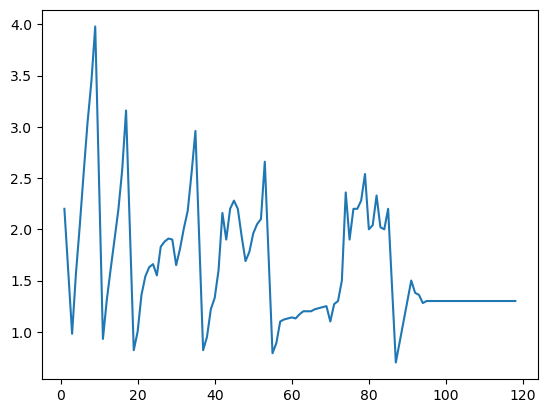

In [23]:
# We can also plot this
plt.plot(data["AtomicNumber"],data["Electronegativity"], label="interpolated EN")

In [24]:
# We will apply this method to rest of the columns with missing values.
# we first have to change all the dtypes to numeric:
data[["FirstIonization", "Density", "MeltingPoint", "BoilingPoint", "NumberOfIsotopes", "Year", "SpecificHeat"]] = data[["FirstIonization", "Density", "MeltingPoint", "BoilingPoint", "NumberOfIsotopes", "Year", "SpecificHeat"]].apply(pd.to_numeric, errors="ignore")

In [25]:
#it worked!
data[["FirstIonization", "Density", "MeltingPoint", "BoilingPoint", "NumberOfIsotopes", "Year", "SpecificHeat"]].dtypes

FirstIonization     float64
Density             float64
MeltingPoint        float64
BoilingPoint        float64
NumberOfIsotopes    float64
Year                float64
SpecificHeat        float64
dtype: object

In [26]:
data["Density"].interpolate(inplace=True)
data["SpecificHeat"].interpolate(inplace=True)

#Note:columns "NumberOfIsotopea" and "Year" do not have any linear relation with atomic number so interpolation makes no sense.
#Note: interpolation will not also work very well for these columns because their missing vslues are in the last 15 elements.
#We will get a constant value for them if we apply this method. I have commented them out for you in case you want to try:

#data["AtomicRadius"].interpolate(inplace=True)
#data["FirstIonization"].interpolate(inplace=True)
#data["MeltingPoint"].interpolate(inplace=True)
#data["BoilingPoint"].interpolate(inplace=True)

# Analyzing and Visualizing Data
## Now that we have our data ready and clean let's move on to the next step

#### We want to use a model to predict the phase of an element considering some of it's features 

In [27]:
#to cancel some errors:
pd.options.mode.chained_assignment = None

## Feature Selection

In [28]:
data.groupby("Phase").mean()

,AtomicNumber,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Year,SpecificHeat,NumberofShells,NumberofValence
Phase,,,,,,,,,,,,,,,,,
artificial,101.678571,255.642857,153.964286,101.678571,101.678571,6.892857,2.300000,1.316786,6.312400,25.462857,1380.927778,3077.000000,104.615385,1971.428571,0.123357,6.892857,3.187662
gas,22.545455,53.335000,30.727273,22.545455,22.545455,2.818182,0.828182,2.447273,15.539127,0.002717,94.209800,102.439091,11.909091,1848.000000,2.255273,2.818182,6.090909
liq,57.500000,140.247000,83.000000,57.500000,57.500000,5.000000,1.450000,2.480000,11.125650,8.310000,250.240000,481.000000,22.500000,1826.000000,0.307000,5.000000,4.980000
solid,49.493506,119.499221,70.000000,49.493506,49.493506,5.012987,1.977606,1.634675,7.089571,8.025545,1450.826494,2851.729870,17.662338,1824.343284,0.378968,5.012987,2.880331


In [29]:
# first we make a new data as we want from our main data
# we will use these features because they seem to have more impact on determining the phase:
data1 = data[[ "AtomicRadius", "Density", "MeltingPoint", "BoilingPoint", "Radioactive", "Phase"]]

In [30]:
# all of our features most be numbers so we will replace yes,no with 0,1 in Radioactivity column:
data1["Radioactive"].replace(("yes", "No"), (1, 0), inplace=True)

In [31]:
#our target(Phase) must be a number too:
data1["Phase"].replace(('artificial', 'gas', "liq", "solid"), (0, 1, 2, 3), inplace=True)

In [32]:
data1.groupby("Phase").mean()

,AtomicRadius,Density,MeltingPoint,BoilingPoint,Radioactive
Phase,,,,,
0,2.300000,25.462857,1380.927778,3077.000000,1.000000
1,0.828182,0.002717,94.209800,102.439091,0.090909
2,1.450000,8.310000,250.240000,481.000000,0.000000
3,1.977606,8.025545,1450.826494,2851.729870,0.103896


In [33]:
#and of course must be cleaned:
data1.dropna(inplace=True)

In [34]:
#we set the features and the target:
X = data1[["AtomicRadius", "Density", "MeltingPoint", "BoilingPoint", "Radioactive"]]
y = data1["Phase"]

In [35]:
# then we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

## Defining our models

## 1- Classification

### I am going to use two models for classification: KNN and Logistic Regression

In [36]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9411764705882353

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9117647058823529


In [38]:
# since the accuracy of KNN is depended on n_neighbors every time we change this number we will get a different result.
# so let's go through 1-25 and see the dispersion of the results:

In [39]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)
print(statistics.mean(scores))
print(max(scores))

[0.8823529411764706, 0.8823529411764706, 0.9117647058823529, 0.9117647058823529, 0.9117647058823529, 0.9117647058823529, 0.9411764705882353, 0.9117647058823529, 0.9411764705882353, 0.9117647058823529, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058]
0.8776470588235293
0.9411764705882353


Text(0, 0.5, 'Testing Accuracy')

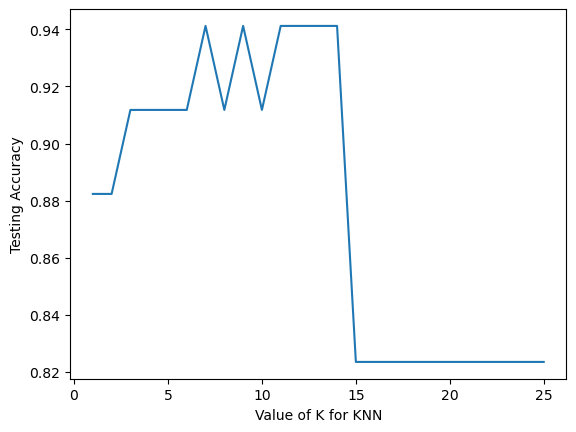

In [40]:
# plot the relationship between K and testing accuracy:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [41]:
#there is another issue:
#every time we change the random_state of our split, the results will change too. 
#That's because of choosing random datas as training and testing sets, and this will affect our prediction.

In [42]:
# so we will use cross validation
# in this approach training set is split into k smaller sets each time
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [43]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9444444444444444


In [44]:
# and now we use cross validation in a wider range of n_neighbors:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(scores.max())
print(scores.mean())

0.8888888888888888
0.8375


Text(0, 0.5, 'Cross-Validated Accuracy')

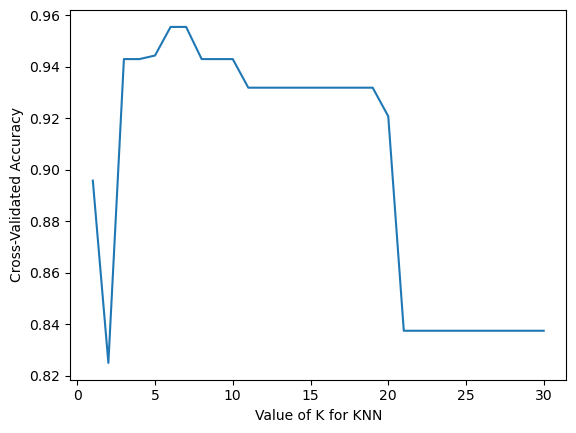

In [45]:
#then plot the results
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [46]:
# we can use this method on logistic regression too:
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9430555555555555


### Hyperparameter tuning

In [47]:
#first we will use GridsearchCV to find the best n_neighbors
#This is just a new approach to what we have already done. The results are expected to be the same:

In [48]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [49]:
# we can make a dataframe to see the results:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.895833,0.108520,{'n_neighbors': 1}
1,0.825000,0.128530,{'n_neighbors': 2}
2,0.943056,0.057080,{'n_neighbors': 3}
3,0.943056,0.057080,{'n_neighbors': 4}
4,0.944444,0.074536,{'n_neighbors': 5}
5,0.955556,0.054433,{'n_neighbors': 6}
6,0.955556,0.054433,{'n_neighbors': 7}
7,0.943056,0.057080,{'n_neighbors': 8}
8,0.943056,0.057080,{'n_neighbors': 9}
9,0.943056,0.057080,{'n_neighbors': 10}


Text(0, 0.5, 'Cross-Validated Accuracy')

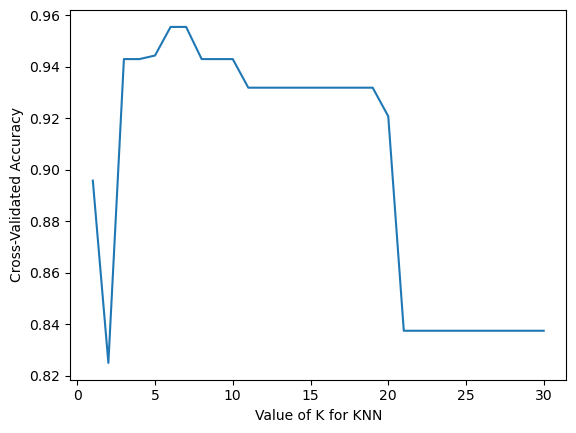

In [50]:
#the plot will also be the same:
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [51]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9555555555555555
{'n_neighbors': 6}
KNeighborsClassifier(n_neighbors=6)


In [52]:
#now let's use this method to determine the other hyperparameter of KNN: 
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [53]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [54]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.895833,0.108520,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.895833,0.108520,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.825000,0.128530,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.895833,0.108520,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.943056,0.057080,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.930556,0.056928,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.943056,0.057080,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.955556,0.054433,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.944444,0.074536,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.955556,0.054433,"{'n_neighbors': 5, 'weights': 'distance'}"


In [55]:
print(grid.best_score_)
print(grid.best_params_)

0.9555555555555555
{'n_neighbors': 4, 'weights': 'distance'}


In [56]:
# we finally found the best hyperparameters for our KNN model

In [57]:
#we can also use RanomizedSearchCV to find the best random hyperparameters
param_dist = dict(n_neighbors=k_range, weights=weight_options)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.955556,0.054433,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.837500,0.048928,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.931944,0.074652,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.837500,0.048928,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.837500,0.048928,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.955556,0.054433,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.955556,0.054433,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.931944,0.074652,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.955556,0.054433,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.931944,0.074652,"{'weights': 'uniform', 'n_neighbors': 15}"


In [58]:
print(rand.best_score_)
print(rand.best_params_)

0.9555555555555555
{'weights': 'distance', 'n_neighbors': 16}


## Outcome:
### We can use KNN with n_neighbors = 16 and weights = distance with accuracy of 0.96 to predict the Phase of elements by having their "AtomicRadius,	Density,	MeltingPoint,	BoilingPoint,	Radioactivity".

In [59]:
# let's test it to see if it works:
# We will choose a random element from our data set, let's say Li.
# We give it's information to our model to predict the phase of:

# First we redefine our X,y and our model:
X = data1[["AtomicRadius", "Density", "MeltingPoint", "BoilingPoint", "Radioactive"]]
y = data1["Phase"]

knn = KNeighborsClassifier(n_neighbors=16, weights="distance")
knn.fit(X, y)
y_pred = knn.predict([[2.1, 0.534, 453.85, 1615.0, 0]])

y_pred


array([3], dtype=int64)

In [60]:
# that's right Li is a solid!

## Visualization

In [61]:
#It's good to see how our data looks like to have a better vision of what we have done.

In [62]:
data1.groupby("Phase").count()

,AtomicRadius,Density,MeltingPoint,BoilingPoint,Radioactive
Phase,,,,,
0,2,2,2,2,2
1,10,10,10,10,10
2,2,2,2,2,2
3,71,71,71,71,71


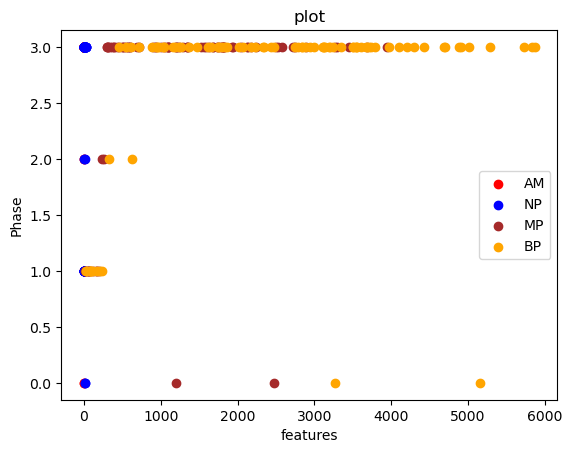

In [63]:
#this plot illustrates how our numeric features are related to different phases.
plt.scatter(data1["AtomicRadius"],y, c="r", label="AM")
plt.scatter(data1["Density"],y, c="b", label="NP")
plt.scatter(data1["MeltingPoint"],y, c="brown", label="MP")
plt.scatter(data1["BoilingPoint"],y, c="orange", label="BP")


plt.xlabel("features")
plt.ylabel("Phase")
plt.title("plot")

plt.legend()
plt.show()

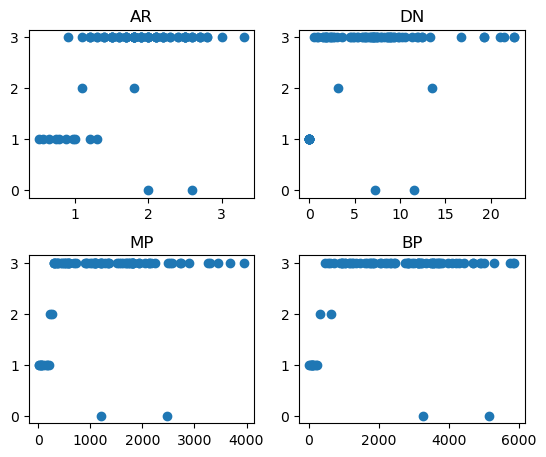

In [64]:
#we can also show each feature in a seperate plot.

figure, axis = plt.subplots(2, 2)

axis[0, 0].scatter(data1["AtomicRadius"], y)
axis[0, 0].set_title("AR")
  
axis[0, 1].scatter(data1["Density"], y)
axis[0, 1].set_title("DN")
  
axis[1, 0].scatter(data1["MeltingPoint"], y)
axis[1, 0].set_title("MP")
  
# For Tanh Function
axis[1, 1].scatter(data1["BoilingPoint"], y)
axis[1, 1].set_title("BP")


#changing the position of the plots to avoid overlap
pos = axis[1, 0].get_position()
new_pos = [pos.x0, pos.y0-0.05, pos.width, pos.height]
axis[1, 0].set_position(new_pos)

pos = axis[1, 1].get_position()
new_pos = [pos.x0, pos.y0-0.05, pos.width, pos.height]
axis[1, 1].set_position(new_pos)

  
plt.show()

array([[<Axes: title={'center': 'AtomicRadius'}, ylabel='Phase'>,
        <Axes: title={'center': 'Density'}, ylabel='Phase'>],
       [<Axes: title={'center': 'MeltingPoint'}, ylabel='Phase'>,
        <Axes: title={'center': 'BoilingPoint'}, ylabel='Phase'>]],
      dtype=object)

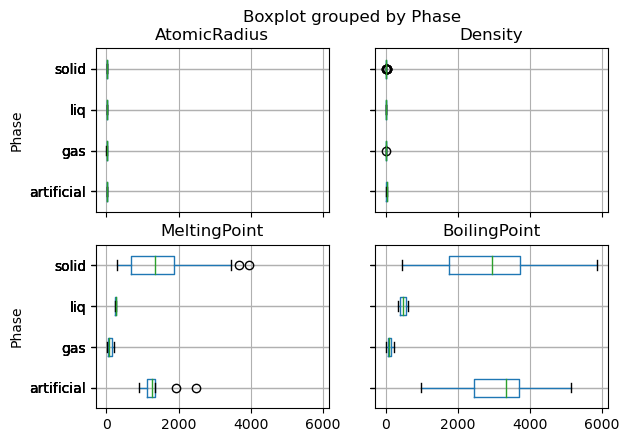

In [65]:
# we can check the outliers by using boxplot
#it is also helpful to see how scatterd features are in each phase.
data.boxplot(column=["AtomicRadius", "Density", "MeltingPoint", "BoilingPoint"], vert=False, by="Phase")

In [66]:
# we can conclude that:
# 1- There is only a few significant outliers in MeltingPoint and Density
# 2- BoilingPoint has a wide range in solid and artificial phase
# 3- MeltingPoint has a wide range in solid phase
# 4- AtomicRadius and Density are centered around low numbers as expected

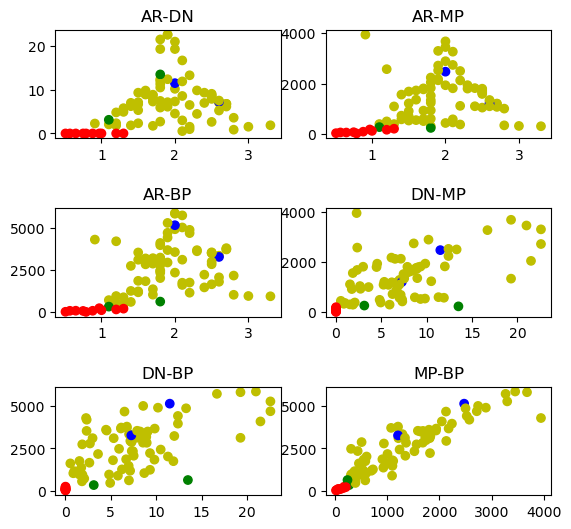

In [67]:
#unfortunately we can't visualize a 5 dimensional plot:(
#so let's visualize all of our features 2 by 2 in seperate plots:

#defining a color map:
color_map = {0 : "b", 1 : "r", 2 : "g", 3 : "y" }  
colors = data1["Phase"].apply(lambda x: color_map[x])


figure, axis = plt.subplots(3, 2)


axis[0, 0].scatter(data1["AtomicRadius"], data1["Density"], c=colors)
axis[0, 0].set_title("AR-DN")
  

axis[0, 1].scatter(data1["AtomicRadius"], data1["MeltingPoint"], c=colors)
axis[0, 1].set_title("AR-MP")
  

axis[1, 0].scatter(data1["AtomicRadius"], data1["BoilingPoint"], c=colors)
axis[1, 0].set_title("AR-BP")
  

axis[1, 1].scatter(data1["Density"], data1["MeltingPoint"], c=colors)
axis[1, 1].set_title("DN-MP")

axis[2, 0].scatter(data1["Density"], data1["BoilingPoint"], c=colors)
axis[2, 0].set_title("DN-BP")


axis[2, 1].scatter(data1["MeltingPoint"], data1["BoilingPoint"], c=colors)
axis[2, 1].set_title("MP-BP")


#changing the position of the plots to avoid overlap
pos = axis[1, 0].get_position()
new_pos = [pos.x0, pos.y0-0.1, pos.width, pos.height]
axis[1, 0].set_position(new_pos)

pos = axis[1, 1].get_position()
new_pos = [pos.x0, pos.y0-0.1, pos.width, pos.height]
axis[1, 1].set_position(new_pos)

pos = axis[2, 0].get_position()
new_pos = [pos.x0, pos.y0-0.2, pos.width, pos.height]
axis[2, 0].set_position(new_pos)


pos = axis[2, 1].get_position()
new_pos = [pos.x0, pos.y0-0.2, pos.width, pos.height]
axis[2, 1].set_position(new_pos)

plt.show()

In [68]:
#this shows us that there might be a good linear relation between meltingpoint and boilingpoint which brings us to our next topic:

## 2- Regression

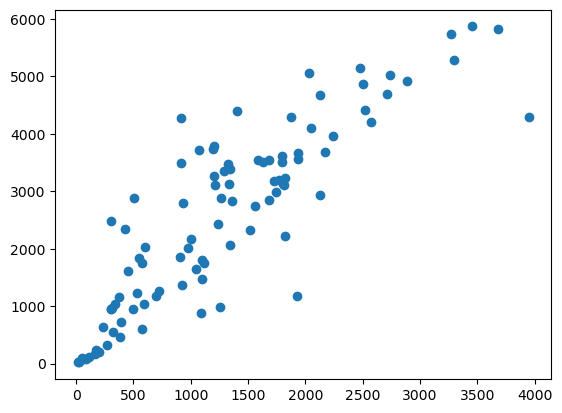

In [69]:
plt.scatter(data["MeltingPoint"], data["BoilingPoint"])

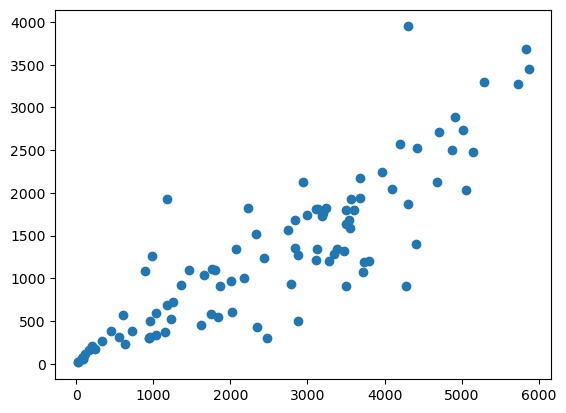

In [70]:
plt.scatter(data["BoilingPoint"], data["MeltingPoint"])

In [71]:
# there is a linear relation in both, but let's see which one is more linear:

In [72]:
#first plot (MP-BP):
X = np.array(data1["MeltingPoint"]).reshape(-1, 1)
y = data1["BoilingPoint"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = linreg.predict(X_test)

In [75]:
r2_score(y_test, y_pred)

0.7468699603282065

In [76]:
#The score that we get depends on the random state that we choose.
#So let's see if we can do any better by testing a range of random states:

rs_range = list(range(1, 51))
rs_scores = []

for rs in rs_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    rs_scores.append(score)
    
#then we make a dataframe to see the scores:
pd.DataFrame(rs_scores, columns = ["Score"]).sort_values(by=["Score"], ascending=False)

,Score
24,0.910167
36,0.905280
30,0.900685
39,0.898420
11,0.887040
6,0.883373
31,0.875573
8,0.868959
26,0.867380
23,0.862819


In [77]:
#you can see that the max of r2_scores is 0.91

#Note!!!!
#Since our index starts from 0, index 24 (which contains the max score) is the 25th iteration.

#conclusion : we will get the best regression when split the data with random_state of 25

In [78]:
#just to make sure:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
r2_score(y_test, y_pred)

0.910167054226148

Text(0.5, 1.0, 'MP-BP')

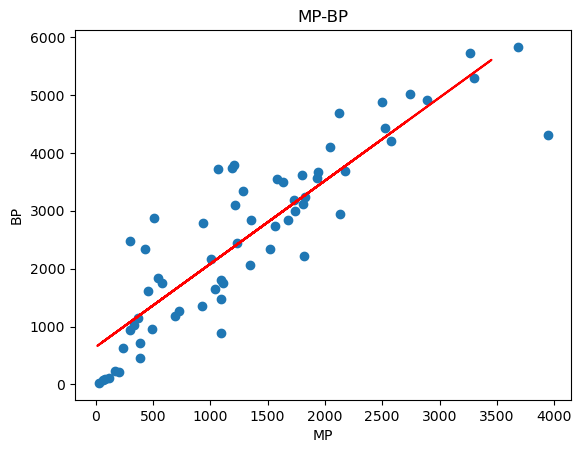

In [79]:
#the line would look like this:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, c="r")
plt.xlabel("MP")
plt.ylabel("BP")
plt.title("MP-BP")

In [80]:
#intercept:
print(linreg.intercept_)
#slope:
print(linreg.coef_)

646.5847771844096
[1.43587334]


In [81]:
# now let's see what happens if we flip X and y:

In [82]:
#second plot (BP-MP):

X = np.array(data1["BoilingPoint"]).reshape(-1, 1)
y = data1["MeltingPoint"]

In [83]:
rs_range = list(range(1, 51))
rs_scores = []

for rs in rs_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    rs_scores.append(score)
    
#then we make a dataframe to see the scores:
pd.DataFrame(rs_scores, columns = ["Score"]).sort_values(by=["Score"], ascending=False)

,Score
24,0.948110
30,0.918387
36,0.913847
39,0.901097
11,0.900869
6,0.899207
31,0.888089
26,0.877380
37,0.872281
8,0.871851


In [84]:
#We will get max score of 0.94 for the same random_state!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
r2_score(y_test, y_pred)


0.9481103709377011

Text(0.5, 1.0, 'BP-MP')

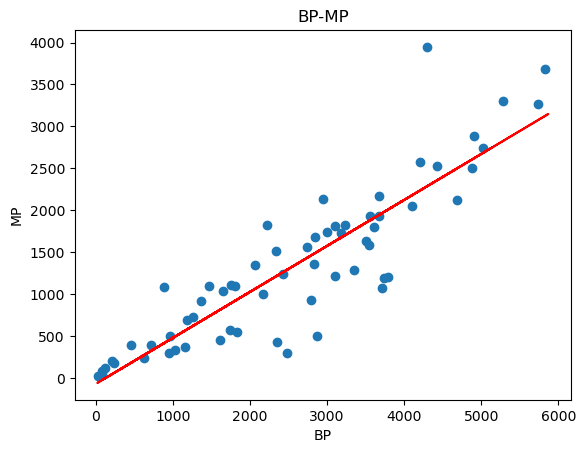

In [85]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, c="r")
plt.xlabel("BP")
plt.ylabel("MP")
plt.title("BP-MP")

In [86]:
#intercept
print(linreg.intercept_)
#slope:
print(linreg.coef_)

-70.98169138340268
[0.54842782]


In [87]:
#we can also use other evaluation metrics for our model such as Mean Squared Error,Root Mean Squared Error, Mean Absolute Error

## Outcome:
### the equation will be derived :
### MeltingPoint = 0.54842782*BoilingPoint -70.98169138340268

In [88]:
#let's choose a random element to test our equation:

In [89]:
data[["Symbol", "MeltingPoint", "BoilingPoint"]].loc[50]

Symbol              Sb
MeltingPoint    904.05
BoilingPoint    1860.0
Name: 50, dtype: object

In [90]:
#Predicted melting point
0.54842782*1860 - 70.98169138340268

949.0940538165974

In [91]:
# Very close !!!